## Import TensorFlow and other libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

import csv, json, ast, random
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

from IPython import display
from sklearn.decomposition import PCA
from collections import defaultdict
import re, string

In [2]:
#(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()
input_file = csv.DictReader(open("RAW_recipes.csv"))

# input_file = input_file[:1000]
mask = "egg"
mask_c = 0
ALL_RECIPES = []
ALL_INGREDIENTS_RAW =  defaultdict(int)

for idx, line in enumerate(input_file):
#     print(idx, line["ingredients"])
#     print(type(line["ingredients"]))
#     print(idx)
    tmp = set(ast.literal_eval(line["tags"]) + line['description'].split(" "))
#     print(tmp)
    ingredients = ast.literal_eval(line["ingredients"])
    
#     if mask in ingredients:
#         mask_c+=1
        
    if "italian" not in tmp:
        continue
    
    for ig in ingredients:
        ALL_INGREDIENTS_RAW[ig]+=1
    
    ALL_RECIPES.append(ingredients)
    
print("total recipes:", len(ALL_RECIPES))
print("last", ALL_RECIPES[-1])
print("total raw ingredients:", len(ALL_INGREDIENTS_RAW))


total recipes: 9128
last ['all-purpose flour', 'unsalted butter', 'egg', 'sugar', 'active dry yeast', 'salt', 'milk', 'vanilla', 'flour', 'plums', 'whipped cream']
total raw ingredients: 4211


In [3]:
#make it small
# ALL_INGREDIENTS_CLEAN = defaultdict(int)
# for ing in ALL_INGREDIENTS_RAW:
#     input_str = ing
    
#     input_str = input_str.lower()
#     input_str = re.sub(r'\d+', '', input_str)
#     input_str = str.maketrans('', '', string.punctuation)
#     print(input_str)
    
#     ALL_INGREDIENTS_CLEAN[ input_str  ] += ALL_INGREDIENTS_RAW[ing]
    
# print(" before", len(ALL_INGREDIENTS_RAW) , "after", len(ALL_INGREDIENTS_CLEAN))





In [81]:
ALL_INGREDIENTS_CLEAN = defaultdict(int)

clean_mask = {
    "quick-cooking",
    "thickened",
#     "vegetarian",
#     "baker's",
    "prepared",
    "extra-large",
    "mexican",
    "italian",
#     "leaf",
    "fresh",
    "frozen",
    "dried",
    "french",
#     "pieces",
    "fat free",
    "fat-free",
    "non-dairy",
    "non-fat",
    "low fat",
    "low-fat",
    "canned",
    "cooked",
    "cool",
    "dark",
    "diced",
    "dry",
    "ground",
    "hot",
    "boneless",
    "liquid",
    "black",
    "mixed",
    "small",
    "white",
#     "sea",
#     "chips",
#     "jumbo",
#     "diced",
#     "whole",
#     "extract"
    
    
}


string_clean_mask = {
    
    "whole wheat",
    
}

substitute_mask = {
    
    "7-up soda": "soda",
    "coca-cola": "soda",
    "club soda": "soda",
    "basic pizza dough": "pizza dough",
    "pizza dough":"pizza dough",
    "100 proof vodka": "vodka",
    "8 inch pie shell": "pie shell",
    "bamboo skewers": "bamboo skewer",
    "poppy seeds": "poppy seed",
    "puff pastry sheet": "puff pastry",
    "puff pastry shells": "puff pastry",
    "ragu pizza sauce": "pizza sauce",
    "sopressata": "soppressata"
    
    
    
    
    
}

simplify_mask = {
    
    
   "pasta",
    "olive oil",
    "cheese",
    "olive",
    "vinegar",
    "black pepper",
    "salami",
    "potato",
    "egg",
    "tomato",
    "mushroom",
    "pepper",
    "yeast",
    "chicken",
    "broccoli",
    "cashews",
    "onion",
    "garlic",
    "orange",
    "flour",
    "beef",
    "water",
    "oregano",
    "basil",
    "pork",
    "wine",
    "sage",
    "cinnamon",
    "lemon",
    "spinach",
    "chocolate",
    "ice cream",
    "vegetables",
    "salt",
    "parsley",
    "bay",
    "beans",
    "cherr",
    "pineapple",
    "shrimp",
    "pickles",
    "whipping cream",
    "marinara sauce",
    "breadcrumb",
    "bacon",
    "clams",
    "condensed milk",
    "baking mix",
    "anchov",
    "buns",
    "salmon",
    "ground meat",
    "syrup",
    "milk",
    "rice",
    "cookie",
    "pudding",
    "yogurt",
    "broth",
    "almond",
    "sugar",
    "fruit",
    "pea",
    "cocoa",
    "asparagus",
    "lasagna noodle",
    "espresso",
    "veal",
    "pita",
    "paprika",
    "rosemary",
    "mustard",
    "hazelnut",
    "thyme",
    "coconut",
    "ham",
    "kale",
    "cilantro",
    "saffron",
    "steak",
    "lettuce",
    "lamb",
    "tofu",
    "oat",
    "shallot",
    "honey",
    "tuna",
    "tabasco",
    "pesto",
    "squash",
    "corn",
    "polenta",
    "cayenne",
    "coffee",
    "artichoke",
    "apple",
    "apricot",
    "chil",
    "funghi",
    "fennel",
    "tarragon",
    "ginger",
    "bread",
    "caper",
    "cauliflower",
    "sour cream",
    "cooking spray",
    "pie crust",
    "raspberry",
    "cabbage",
    "crumbs",
    "stock",
    "butter",
    "soup",
    "sole",
    "table cream",
    "bouillon",
    "italian salad dressing",
    "coriander",
    "capsicum",
    "pecan",
    "mango",
    "lime",
    "taro",
    "cake mix",
    "marzipan",
    "biscuit",
    "margarine",
    "banana",
    "turkey",
    "prosciutto",
    "italian dressing",
    "pizza crust",
    "fillet",
    "mint",
    "linguine",
    "grape",
    "meatball",
    "cracker",
    "mayo",
    "soy sauce",
    "gelato",
    "pomegranate",
    "chorizo",
    "morsels",
    "cranberrie",
    "sriracha",
    "cashew",
    "celery",
    "ciabatta",
    "citrus",
    "crab",
    "cucumber",
    "cumin",
    "curry",
    "raisin",
    "dill",
    "gravy",
    "lentil",
    "leek",
    "seasoning",
    "blackberr",
    "alfredo",
    "blueberr",
    "carrot",
    "baguette",
    "avocado",
    "arugula",
    "sweetener",
    "beet",
    "whiskey",
    "cannellini",
    "clementine",
    "clam",
    "scallion",
    "scallop",
    "ladyfinger",
    "jalapeno",
    "oxtail",
    "sardine",
    "toothpick",
    "calamari",
    "aubergine",
    "brussels",
    "courgette",
    "coleslaw",
    "amaretto",
    "balsamic",
    "allspice",
    "pistachio",
    "ranch",
    "bruschetta",
    "bisquick",
    "tortilla",
    "sirloin",
    "vinaigrette",
    
    
    
#     "sprout"
    
    
}

In [82]:



for i in  ALL_INGREDIENTS_RAW:
    
    #remove 
    for s in string_clean_mask:
        i = i.replace(s, '')
    
    #substitute
    if i in substitute_mask:
        i = substitute_mask[i]
    
    
    #simplify
    for simp in simplify_mask:
        if simp in i:
            i = simp
    
    tmp = i.split(" ")
    tmp2 = []
    for t in tmp:
        if t in clean_mask:
            continue
        
        
        
        tmp2.append(t)
    
    ALL_INGREDIENTS_CLEAN[" ".join(tmp2)] +=1
    
        

        
mysorted = [k for k in ALL_INGREDIENTS_CLEAN]
mysorted.sort()

smalls = 0
for i in mysorted:
    
    if ALL_INGREDIENTS_CLEAN[i] < 5:
        print(i, ALL_INGREDIENTS_CLEAN[i])
        smalls+=1

print("\n####")
print("smalls:", smalls,)
print("before", len(ALL_INGREDIENTS_RAW) , "after", len(ALL_INGREDIENTS_CLEAN))


 1
 elbow macaroni 1
 fettuccine 1
 fusilli 1
 macaroni 1
 noodles 1
 orzo 1
 panko 1
 penne 2
 pizza dough 1
 ravioli 1
 roll 1
 spaghetti 1
35% cream 1
a.1. original sauce 1
active starter 1
adobo sauce 1
agave nectar 1
alcohol 1
alfalfa sprout 1
allspice 3
aluminum foil 1
amaretti 1
amarettinis 1
amaretto 3
amarula cream liqueur 1
ammonia 1
anchov 4
angel food cake 1
angostura bitters 1
anise 1
anise extract 1
anise flavoring 1
anise oil 1
anise seed 1
anise seeds 1
aniseed 1
anisette 1
arrowroot 1
artificial vanilla flavoring 1
arugula 4
asafoetida powder 1
assorted herb leaves 1
au jus mix 1
au jus sauce 1
aubergine 2
avocado 2
baby food 1
baby greens 2
baby lima bean 1
baby rocket 1
bacardi limon 1
baguette 4
baking mix 3
baking powder 1
baking sheet 1
baking soda 1
bamboo skewer 2
barbecue sauce 1
barilla lasagna 1
barley 2
bean 1
bean sprouts 1
beer 2
belgian endive 1
berries 3
biscotti 1
biscotti liqueur 1
bisquick 2
blackberr 4
blackstrap molasses 1
blueberr 3
boboli thin piz

<BarContainer object of 966 artists>

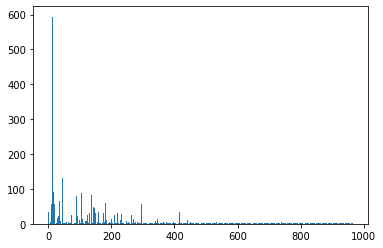

In [68]:
plt.bar( [k for k in range(len(ALL_INGREDIENTS_CLEAN))], [ALL_INGREDIENTS_CLEAN[k] for k in ALL_INGREDIENTS_CLEAN] )

(array([887.,  23.,   9.,  13.,   8.,   2.,   0.,   1.,   0.,   1.,   0.,
          1.,   0.,   0.,   1.]),
 array([  1.        ,  14.13333333,  27.26666667,  40.4       ,
         53.53333333,  66.66666667,  79.8       ,  92.93333333,
        106.06666667, 119.2       , 132.33333333, 145.46666667,
        158.6       , 171.73333333, 184.86666667, 198.        ]),
 <a list of 15 Patch objects>)

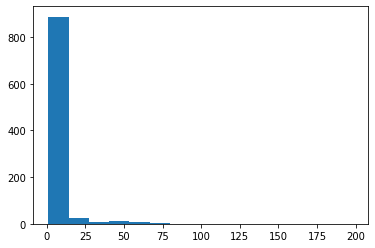

In [86]:
plt.hist( [ALL_INGREDIENTS_CLEAN[k] for k in ALL_INGREDIENTS_CLEAN], bins=15 )

In [3]:
for i in range(5):
    print(ALL_RECIPES[i], "\n\n")

['fennel seeds', 'green olives', 'ripe olives', 'garlic', 'peppercorn', 'orange rind', 'orange juice', 'red chile', 'extra virgin olive oil'] 


['tri-color spiral pasta', 'dill pickles', 'ripe olives', 'green onion', 'chives', 'sweet pepper', 'water chestnut', 'tomatoes', 'ham', 'cheese', 'olive oil', 'cider vinegar', 'onion powder', 'garlic powder', 'salt and pepper', 'italian seasoning'] 


['italian sausage', 'ground beef', 'garlic', 'dried basil', 'salt', 'whole tomato', 'tomato paste', 'ricotta cheese', 'cottage cheese', 'parmesan cheese', 'parsley flakes', 'eggs', 'ground black pepper', 'lasagna noodle', 'mozzarella cheese'] 


['tomatoes', 'garlic', 'onion', 'button mushrooms', 'hot sauce', 'dried oregano', 'dried basil', 'fresh parsley', 'water', 'salsa', 'chicken breasts', 'olive oil', 'fresh ground black pepper', 'parmesan cheese', 'pasta'] 


['ciabatta', 'provolone cheese', 'genoa salami', 'ham', 'tomatoes', 'sweet onion', 'green olives', 'kalamata olive', 'fresh basil', '

In [4]:
mlb = MultiLabelBinarizer()
mlb.fit_transform(ALL_RECIPES)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
print(mlb.classes_)
TOTAL_CLASSES = len(mlb.classes_)
print(TOTAL_CLASSES)

['1% fat cottage cheese' '1% low-fat milk' '100 proof vodka' ...
 'ziti pasta' 'zucchini' 'zucchini with italian-style tomato sauce']
4211


In [6]:
PCA_latent = 3500
TOTAL_CLASSES = PCA_latent

In [7]:
#20% test
total_recipes = len(ALL_RECIPES)
print(total_recipes)

set_index_divisor = int(total_recipes * 0.8)

random.seed(42)
random.shuffle(ALL_RECIPES)
ALL_RECIPES_ENCODED = mlb.transform(ALL_RECIPESALL_INGR)
pca =  PCA(n_components=PCA_latent)
ALL_RECIPES_ENCODED = pca.fit_transform(ALL_RECIPES_ENCODED)



training_recipes, test_recipes = ALL_RECIPES_ENCODED[:set_index_divisor], ALL_RECIPES_ENCODED[set_index_divisor:]
print( len(training_recipes), len(test_recipes), len(training_recipes)+ len(test_recipes) )

9128
7302 1826 9128


In [8]:
# print(training_recipes[0])
# training_recipes, test_recipes = mlb.transform(training_recipes), mlb.transform(test_recipes)
# print(training_recipes[0])

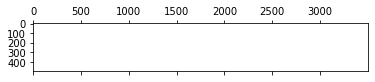

In [9]:
plt.spy(training_recipes[:500])

In [10]:
# train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
# test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

# # Normalizing the images to the range of [0., 1.]
# train_images /= 255.
# test_images /= 255.

# # Binarization
# train_images[train_images >= .5] = 1.
# train_images[train_images < .5] = 0.
# test_images[test_images >= .5] = 1.
# test_images[test_images < .5] = 0.

In [11]:
training_recipes, test_recipes = training_recipes.astype('float32'), test_recipes.astype('float32')


In [12]:
print(training_recipes[0])

[-3.4543818e-01 -4.9670967e-01 -4.4716817e-01 ... -8.0240227e-04
 -6.5846567e-04 -2.0640211e-04]


In [13]:
TRAIN_BUF = 60000
BATCH_SIZE = 300

TEST_BUF = 10000

## Use *tf.data* to create batches and shuffle the dataset

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices(training_recipes).shuffle(TRAIN_BUF).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices(test_recipes).shuffle(TEST_BUF).batch(BATCH_SIZE)

## Wire up the generative and inference network with *tf.keras.Sequential*

In our VAE example, we use two small ConvNets for the generative and inference network. Since these neural nets are small, we use `tf.keras.Sequential` to simplify our code. Let $x$ and $z$ denote the observation and latent variable respectively in the following descriptions.

### Generative Network
This defines the generative model which takes a latent encoding as input, and outputs the parameters for a conditional distribution of the observation, i.e. $p(x|z)$. Additionally, we use a unit Gaussian prior $p(z)$ for the latent variable.

### Inference Network
This defines an approximate posterior distribution $q(z|x)$, which takes as input an observation and outputs a set of parameters for the conditional distribution of the latent representation. In this example, we simply model this distribution as a diagonal Gaussian. In this case, the inference network outputs the mean and log-variance parameters of a factorized Gaussian (log-variance instead of the variance directly is for numerical stability).

### Reparameterization Trick
During optimization, we can sample from $q(z|x)$ by first sampling from a unit Gaussian, and then multiplying by the standard deviation and adding the mean. This ensures the gradients could pass through the sample to the inference network parameters.

### Network architecture
For the inference network, we use two convolutional layers followed by a fully-connected layer. In the generative network, we mirror this architecture by using a fully-connected layer followed by three convolution transpose layers (a.k.a. deconvolutional layers in some contexts). Note, it's common practice to avoid using batch normalization when training VAEs, since the additional stochasticity due to using mini-batches may aggravate instability on top of the stochasticity from sampling.

In [15]:
class CVAE_old(tf.keras.Model):
  def __init__(self, latent_dim):
    super(CVAE_old, self).__init__()
    self.latent_dim = latent_dim
    self.inference_net = tf.keras.Sequential(
      [
          tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),  #784
          tf.keras.layers.Conv2D(
              filters=32, kernel_size=3, strides=(2, 2), activation='relu'),  #784/2 = 392
          tf.keras.layers.Conv2D(
              filters=64, kernel_size=3, strides=(2, 2), activation='relu'), # 392/2 = 196
          tf.keras.layers.Flatten(),
          # No activation
          tf.keras.layers.Dense(latent_dim + latent_dim),    #196 -> 50+50
      ]
    )

    self.generative_net = tf.keras.Sequential(
        [
          tf.keras.layers.InputLayer(input_shape=(latent_dim,)),    #50
          tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),  #1568
          tf.keras.layers.Reshape(target_shape=(7, 7, 32)),  #1562
          tf.keras.layers.Conv2DTranspose(
              filters=64,
              kernel_size=3,
              strides=(2, 2),
              padding="SAME",
              activation='relu'),
          tf.keras.layers.Conv2DTranspose(
              filters=32,
              kernel_size=3,
              strides=(2, 2),
              padding="SAME",
              activation='relu'),
          # No activation
          tf.keras.layers.Conv2DTranspose(
              filters=1, kernel_size=3, strides=(1, 1), padding="SAME"),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.inference_net(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.generative_net(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs

    return logits

In [16]:
class CVAE(tf.keras.Model):
  def __init__(self, latent_dim):
    
    #TOTAL_CLASSES = 14942
    
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.inference_net = tf.keras.Sequential(
      [
#           tf.keras.layers.InputLayer(input_shape=(TOTAL_CLASSES, 1, 1)),
#           tf.keras.layers.Conv2D(
#               filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
#           tf.keras.layers.Conv2D(
#               filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
#           tf.keras.layers.Flatten(),
#           # No activation
#           tf.keras.layers.Dense(latent_dim + latent_dim),
          
          Dense(900, input_shape=(TOTAL_CLASSES,),  activation=tf.nn.leaky_relu ),
          Dense(400,  activation=tf.nn.leaky_relu),
           Dense(latent_dim + latent_dim,  activation=tf.nn.leaky_relu),
           
          
          
      ]
    )

    self.generative_net = tf.keras.Sequential(
        [
#           tf.keras.layers.InputLayer(input_shape=(latent_dim,)),  #input_shape = 50
#           tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu), # units= 1568
#           tf.keras.layers.Reshape(target_shape=(7, 7, 32)), #7 by 7, 32 samples = 1568
#           tf.keras.layers.Conv2DTranspose(
#               filters=64,
#               kernel_size=3,
#               strides=(2, 2),
#               padding="SAME",
#               activation='relu'),      ceiling(input_dimension / stride):  ceil(1568/2) = 784
#           tf.keras.layers.Conv2DTranspose(
#               filters=32,
#               kernel_size=3,
#               strides=(2, 2),
#               padding="SAME",
#               activation='relu'), == ceil(784/2) = 392
#           # No activation
#           tf.keras.layers.Conv2DTranspose(
#               filters=1, kernel_size=3, strides=(1, 1), padding="SAME"), == 392
            
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)), #latent?
            tf.keras.layers.Dense(units=400, activation=tf.nn.leaky_relu), #
            
            tf.keras.layers.Dense(units=900, activation=tf.nn.leaky_relu), # 
            tf.keras.layers.Dense(units=TOTAL_CLASSES, activation=tf.nn.leaky_relu), # 
            
#             tf.keras.layers.Dense(units=TOTAL_CLASSES, activation=tf.nn.sigmoid), # 
            tf.keras.layers.Activation(activation=tf.nn.sigmoid)
            
            
            
            
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.inference_net(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    print("mean:", mean, mean.shape)
    print("logvar:", logvar, )
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.generative_net(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs

    return logits

## Define the loss function and the optimizer

VAEs train by maximizing the evidence lower bound (ELBO) on the marginal log-likelihood:

$$\log p(x) \ge \text{ELBO} = \mathbb{E}_{q(z|x)}\left[\log \frac{p(x, z)}{q(z|x)}\right].$$

In practice, we optimize the single sample Monte Carlo estimate of this expectation:

$$\log p(x| z) + \log p(z) - \log q(z|x),$$
where $z$ is sampled from $q(z|x)$.

**Note**: we could also analytically compute the KL term, but here we incorporate all three terms in the Monte Carlo estimator for simplicity.

In [17]:
optimizer = tf.keras.optimizers.Adam(1e-4)

def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)

@tf.function
def compute_loss(model, x):
#   print("compute loss called")
  mean, logvar = model.encode(x)
#   print("model encoded")
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)

  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
#   print("cross_ent:", cross_ent.shape)
#   logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3]) #OLD: cross_ent (100, 28, 28, 1), NEW: cross_ent: (100, 14942)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1,]) #OLD: cross_ent (100, 28, 28, 1), NEW: cross_ent: (100, 14942)

  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)

@tf.function
def compute_apply_gradients(model, x, optimizer):
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

## Training

* We start by iterating over the dataset
* During each iteration, we pass the image to the encoder to obtain a set of mean and log-variance parameters of the approximate posterior $q(z|x)$
* We then apply the *reparameterization trick* to sample from $q(z|x)$
* Finally, we pass the reparameterized samples to the decoder to obtain the logits of the generative distribution $p(x|z)$
* **Note:** Since we use the dataset loaded by keras with 60k datapoints in the training set and 10k datapoints in the test set, our resulting ELBO on the test set is slightly higher than reported results in the literature which uses dynamic binarization of Larochelle's MNIST.

## Generate Images

* After training, it is time to generate some images
* We start by sampling a set of latent vectors from the unit Gaussian prior distribution $p(z)$
* The generator will then convert the latent sample $z$ to logits of the observation, giving a distribution $p(x|z)$
* Here we plot the probabilities of Bernoulli distributions


In [18]:
epochs = 100
latent_dim = 50
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

In [19]:
latent_dim = 50

new_model = CVAE(latent_dim)
new_model.inference_net.build()

print("inference_net \n")
new_model.inference_net.summary()

print("#"*10 +"\n")
print("generative_net")
new_model.generative_net.build()

new_model.generative_net.summary()

inference_net 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 900)               3150900   
_________________________________________________________________
dense_7 (Dense)              (None, 400)               360400    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               40100     
Total params: 3,551,400
Trainable params: 3,551,400
Non-trainable params: 0
_________________________________________________________________
##########

generative_net
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 400)               20400     
_________________________________________________________________
dense_10 (Dense)             (None, 900)     

In [20]:
# def generate_and_save_images(model, epoch, test_input):
#   predictions = model.sample(test_input)
#   fig = plt.figure(figsize=(4,4))

#   for i in range(predictions.shape[0]):
#       plt.subplot(4, 4, i+1)
#       plt.imshow(predictions[i, :, :, 0], cmap='gray')
#       plt.axis('off')

#   # tight_layout minimizes the overlap between 2 sub-plots
#   plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
#   plt.show()


def generate_recipe(model, epoch ,test_input):
    predictions = model.sample(test_input)
#     print(predictions.shape)
#     maxi, mini = max(predictions[0]), min(predictions[0])
#     print("maxi",maxi, "mini",mini)
#     print(predictions[0])
    return predictions
    

In [28]:
# generate_and_save_images(model, 0, random_vector_for_generation)
generate_recipe(model,0, random_vector_for_generation)

# error_list = []

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for id_tx, train_x in enumerate(train_dataset):
#         print("train_shape:", train_x.shape)
        
        compute_apply_gradients(model, train_x, optimizer)
#         if id_tx % 20 == 0:
#             print("epoch:", epoch, "-- train ", id_tx, " -- ", time.time() - start_time)
        
  end_time = time.time()

  if epoch % 1 == 0:
    loss = tf.keras.metrics.Mean()
    for test_x in test_dataset:
        
        loss(compute_loss(model, test_x))
    elbo = -loss.result()
    error_list.append(elbo)
    #display.clear_output(wait=False)
    print('Epoch: {}, Test set ELBO: {}, '
          'time elapse for current epoch {}'.format(epoch,
                                                    elbo,
                                                    end_time - start_time))
#     generate_and_save_images(
#         model, epoch, random_vector_for_generation)
    generate_recipe(model,epoch, random_vector_for_generation)


Epoch: 1, Test set ELBO: -2426.73779296875, time elapse for current epoch 2.1961941719055176
Epoch: 2, Test set ELBO: -2426.66162109375, time elapse for current epoch 2.1187779903411865
Epoch: 3, Test set ELBO: -2426.66015625, time elapse for current epoch 2.2194058895111084
Epoch: 4, Test set ELBO: -2426.568359375, time elapse for current epoch 2.2086708545684814
Epoch: 5, Test set ELBO: -2426.546875, time elapse for current epoch 2.245241165161133
Epoch: 6, Test set ELBO: -2426.496826171875, time elapse for current epoch 2.0915870666503906
Epoch: 7, Test set ELBO: -2426.499267578125, time elapse for current epoch 2.016680955886841
Epoch: 8, Test set ELBO: -2426.431884765625, time elapse for current epoch 2.014625072479248
Epoch: 9, Test set ELBO: -2426.454345703125, time elapse for current epoch 2.0276381969451904
Epoch: 10, Test set ELBO: -2426.423828125, time elapse for current epoch 2.0751609802246094
Epoch: 11, Test set ELBO: -2426.452880859375, time elapse for current epoch 2.04

Epoch: 89, Test set ELBO: -2426.02880859375, time elapse for current epoch 2.150333881378174
Epoch: 90, Test set ELBO: -2426.032470703125, time elapse for current epoch 2.2119898796081543
Epoch: 91, Test set ELBO: -2426.032470703125, time elapse for current epoch 2.243299961090088
Epoch: 92, Test set ELBO: -2426.033203125, time elapse for current epoch 2.2472970485687256
Epoch: 93, Test set ELBO: -2426.028076171875, time elapse for current epoch 2.236647129058838
Epoch: 94, Test set ELBO: -2426.024658203125, time elapse for current epoch 2.198026180267334
Epoch: 95, Test set ELBO: -2426.02880859375, time elapse for current epoch 2.4006199836730957
Epoch: 96, Test set ELBO: -2426.019775390625, time elapse for current epoch 2.2387468814849854
Epoch: 97, Test set ELBO: -2426.029296875, time elapse for current epoch 2.1745872497558594
Epoch: 98, Test set ELBO: -2426.026611328125, time elapse for current epoch 2.178440809249878
Epoch: 99, Test set ELBO: -2426.026611328125, time elapse for c

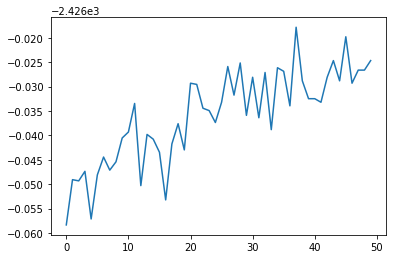

In [30]:
# plt.plot(   , error_list)
y = error_list[150:]
x = [i for i in range(len(y))]

plt.plot(x,y)

<BarContainer object of 4211 artists>

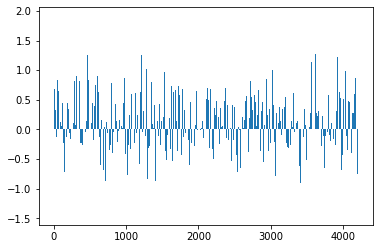

In [31]:
p = generate_recipe(model, 1, random_vector_for_generation)[0]
p = pca.inverse_transform(p)
plt.bar([i for i in range(len(p))], p)

In [37]:
avg = sum(p)/len(p)
print(avg)

print("maxi:", max(p), "min:",min(p))

p2 = tf.sigmoid(p)
print(max(p2), min(p2))

# avg2 = sum(p2)/len(p2)
# print(avg2)

p3 = []
total_ingre = 0
for col in p2:
    if col > 0.5:
        p3.append(1)
        total_ingre+=1
    else:
        p3.append(0)

print("total ingre", total_ingre)

0.0833414067715647
maxi: 1.8932839178001788 min: -1.4410237072323027
tf.Tensor(0.8691295075546819, shape=(), dtype=float64) tf.Tensor(0.1913868716883919, shape=(), dtype=float64)
total ingre 2441


(4211,)


<BarContainer object of 4211 artists>

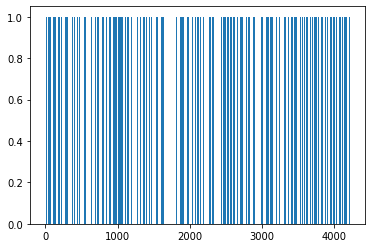

In [36]:
print(p2.shape)
plt.bar([i for i in range(len(p3))], p3)

In [ ]:
plt.rcParams["figure.figsize"] = (40,20)
plt.spy(training_recipes)
# print(list(p))